(150, 4) (150,)
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

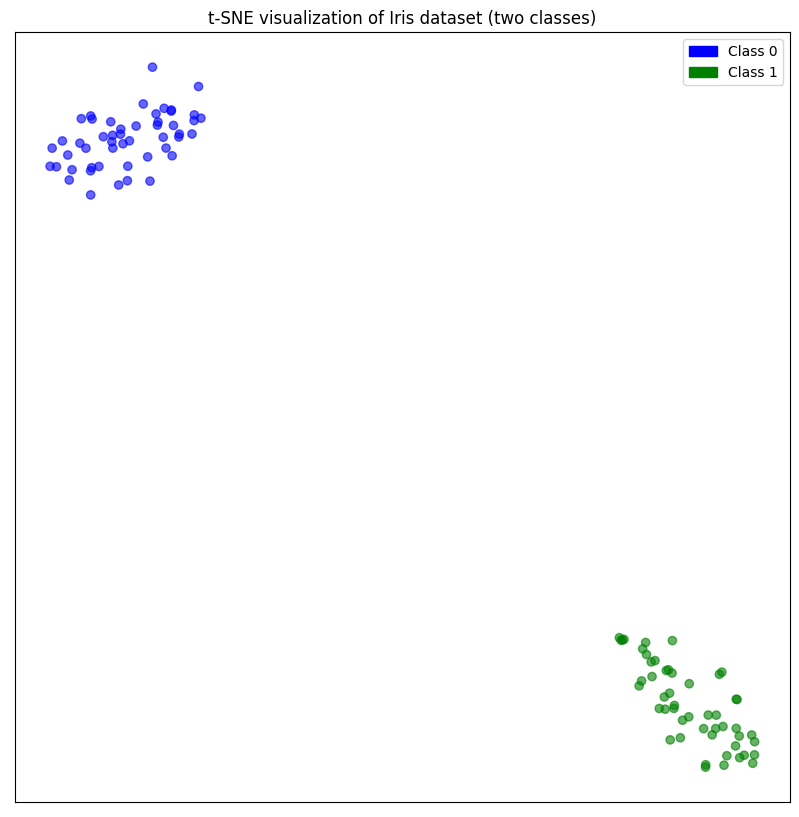

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from matplotlib.patches import Patch

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
print(X.shape, y.shape)
# Select only two of the three classes
selected_classes = [0, 1]  # For example, you can choose any two classes
mask = np.isin(y, selected_classes)
X_selected = X[mask]
y_selected = y[mask]
print(mask, y_selected)
# Shuffle the data
X_selected, y_selected = shuffle(X_selected, y_selected, random_state=42)

# Check unique labels
print("Unique labels in selected data:", np.unique(y_selected))

# TSNE parameters
perplexity_value = 30
if perplexity_value >= len(X_selected):
    raise ValueError("Perplexity must be less than the number of samples.")

# Perform TSNE
transformer = TSNE(n_components=2, perplexity=perplexity_value, verbose=2, random_state=42)
X_transformed = transformer.fit_transform(X_selected)

# Plotting
fig, plot = plt.subplots()
fig.set_size_inches(10, 10)

colors = ["blue", "green"]  # Specify colors for the two classes
plot.scatter(
    X_transformed[:, 0],
    X_transformed[:, 1],
    c=[colors[label] for label in y_selected],
    alpha=0.6
)
plot.set_xticks(())
plot.set_yticks(())

# Create legend
legends = []
for label in np.unique(y_selected):
    color = colors[label]
    patch = Patch(color=color, label=f"Class {label}")
    legends.append(patch)

plot.legend(handles=legends)
plt.title("t-SNE visualization of Iris dataset (two classes)")
plt.show()
